In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

a new york road safety officer gave you this dataset about accidents that have happened across the city of new york, 
he wants to know what town had the most number of accidents and the death and injury rate compared to these accidents
in addition he want to know the reason behind most accidents that occur
he also wants to know the type of people mostly involved in these accidents
he wants to know the number of accidents that have happened through each month of the year

Questions
number of accidents per borough
 
Context
when the on street name and cross street name are present the accident happened at an intersection 
when its only the on street name is present, the accident happened on a main road 
when only the off street name is present, the accident happened at a parking lot or an alleyway 
so either the cross street name and on street name is null and the off street name is present 
or the on street name is present and the off street and cross street name is null 
or the on street and cross street name is present and the off street name is null

Bronx has a zip code between 10451 and 10475, latitude between 0 and 40.912884
Queens has a zipcode between 11001 and 11697, latitude between 0 and 40.797800
Manhattan has a zip code between 10000 and 10282, latitude between 0 and 40.873020
Brooklyn has a zip code between 11201 and 11421, latitude between 0 nd 40.821205
Staten island has a zip code between 10301 and 10314

In [220]:
#df = pd.read_csv(r'C:\Users\Seyi\Desktop\NYC Accidents 2020.csv')
#dt.head(50)
dt.sort_values('Crash_date', ascending = False)

,Crash_date,Crash_time,Borough,Latitude,Longitude,On_street_name,Cross_street_name,Off_street_name,Number_of_persons_injured,Number_of_persons_killed,Number_of_pedestrians_injured,Number_of_pedestrians_killed,Number_of_cyclist_injured,Number_of_cyclist_killed,Number_of_motorist_injured,Number_of_motorist_killed,Contributing_factor_vehicle_1,Contributing_factor_vehicle_2,Collision_id,Vehicle_type_code_1,Vehicle_type_code_2
0,2020-08-29,15:40:00,Bronx,40.892100,-73.833760,Pratt avenue,Strang avenue,Unspecified,0,0,0,0,0,0,0,0,Passing too closely,Unspecified,4342908,Sedan,Station wagon/sport utility vehicle
130,2020-08-29,21:00:00,Bronx,40.877460,-73.853745,Laconia avenue,East 215 street,Unspecified,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4343253,Station wagon/sport utility vehicle,Unspecified
132,2020-08-29,16:35:00,Queens,40.693170,-73.744830,Francis lewis boulevard,Springfield boulevard,Unspecified,0,0,0,0,0,0,0,0,Driver inattention/distraction,Unspecified,4342737,Sedan,Sedan
133,2020-08-29,02:40:00,Bronx,40.800446,-73.910866,East 134 street,Walnut avenue,Unspecified,1,0,0,0,0,0,1,0,Failure to yield right-of-way,Unspecified,4342678,Sedan,Box truck
134,2020-08-29,12:20:00,Brooklyn,40.804700,-73.912430,East 138 street,Bruckner boulevard,Unspecified,0,0,0,0,0,0,0,0,Driver inattention/distraction,Unspecified,4343124,Box truck,Pick-up truck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74655,2020-01-01,20:38:00,Bronx,40.877827,-73.879585,Bainbridge avenue,East 208 street,Unspecified,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4268496,Sedan,Unspecified
74654,2020-01-01,17:51:00,Brooklyn,40.764650,-73.823494,Northern boulevard,Unspecified,Unspecified,0,1,0,1,0,0,0,0,Unspecified,Unspecified,4267694,Station wagon/sport utility vehicle,Unspecified
74653,2020-01-01,03:35:00,Brooklyn,40.674300,-73.933390,Schenectady avenue,Unspecified,Unspecified,0,0,0,0,0,0,0,0,Driver inattention/distraction,Unspecified,4267638,Sedan,Sedan
74652,2020-01-01,02:05:00,Staten island,40.645924,-74.086030,Hamilton avenue,Westervelt avenue,Unspecified,0,0,0,0,0,0,0,0,Passing or lane usage improper,Unspecified,4268480,Sedan,Unspecified


In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
dt = df.copy() #made a copy of the dataset

In [239]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70318 entries, 0 to 74880
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Crash_date                     70318 non-null  datetime64[ns]
 1   Crash_time                     70318 non-null  datetime64[ns]
 2   Borough                        70318 non-null  object        
 3   Latitude                       70318 non-null  float64       
 4   Longitude                      70318 non-null  float64       
 5   On_street_name                 70318 non-null  object        
 6   Cross_street_name              70318 non-null  object        
 7   Off_street_name                70318 non-null  object        
 8   Number_of_persons_injured      70318 non-null  int64         
 9   Number_of_persons_killed       70318 non-null  int64         
 10  Number_of_pedestrians_injured  70318 non-null  int64         
 11  Number_of_pedestrian

In [183]:
dt.isnull().sum()

Crash_date                       0
Crash_time                       0
Borough                          0
Latitude                         0
Longitude                        0
On_street_name                   0
Cross_street_name                0
Off_street_name                  0
Number_of_persons_injured        0
Number_of_persons_killed         0
Number_of_pedestrians_injured    0
Number_of_pedestrians_killed     0
Number_of_cyclist_injured        0
Number_of_cyclist_killed         0
Number_of_motorist_injured       0
Number_of_motorist_killed        0
Contributing_factor_vehicle_1    0
Contributing_factor_vehicle_2    0
Collision_id                     0
Vehicle_type_code_1              0
Vehicle_type_code_2              0
dtype: int64

In [184]:
(dt.isnull().sum()/df.shape[0]) * 100

Crash_date                       0.0
Crash_time                       0.0
Borough                          0.0
Latitude                         0.0
Longitude                        0.0
On_street_name                   0.0
Cross_street_name                0.0
Off_street_name                  0.0
Number_of_persons_injured        0.0
Number_of_persons_killed         0.0
Number_of_pedestrians_injured    0.0
Number_of_pedestrians_killed     0.0
Number_of_cyclist_injured        0.0
Number_of_cyclist_killed         0.0
Number_of_motorist_injured       0.0
Number_of_motorist_killed        0.0
Contributing_factor_vehicle_1    0.0
Contributing_factor_vehicle_2    0.0
Collision_id                     0.0
Vehicle_type_code_1              0.0
Vehicle_type_code_2              0.0
dtype: float64

#### Data Cleaning

In [9]:
#Columns
dt.columns = dt.columns.str.replace(' ', '_').str.capitalize()
dt.drop(columns = ['Location', 'Zip_code', 'Contributing_factor_vehicle_3', 'Contributing_factor_vehicle_4', 'Contributing_factor_vehicle_5', 'Vehicle_type_code_3', 'Vehicle_type_code_4', 'Vehicle_type_code_5'], inplace = True)

dt.columns

Index(['Crash_date', 'Crash_time', 'Borough', 'Latitude', 'Longitude',
       'On_street_name', 'Cross_street_name', 'Off_street_name',
       'Number_of_persons_injured', 'Number_of_persons_killed',
       'Number_of_pedestrians_injured', 'Number_of_pedestrians_killed',
       'Number_of_cyclist_injured', 'Number_of_cyclist_killed',
       'Number_of_motorist_injured', 'Number_of_motorist_killed',
       'Contributing_factor_vehicle_1', 'Contributing_factor_vehicle_2',
       'Collision_id', 'Vehicle_type_code_1', 'Vehicle_type_code_2'],
      dtype='object')

In [10]:
#CRASH DATE
dt.Crash_date = dt['Crash_date'].astype('datetime64[ns]')
dt.Crash_date.info()
dt['Borough'] = dt['Borough'].str.capitalize()

<class 'pandas.core.series.Series'>
RangeIndex: 74881 entries, 0 to 74880
Series name: Crash_date
Non-Null Count  Dtype         
--------------  -----         
74881 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 585.1 KB


In [238]:
#CRASH TIME
dt['Crash_time'] = pd.to_datetime(dt['Crash_time'])

C:\Users\Seyi\AppData\Local\Temp\ipykernel_9428\2711676849.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt['Crash_time'] = pd.to_datetime(dt['Crash_time'])


In [11]:
#LATITUDE
#checking the range of latitude, zip code and longitude for each borough
#dt[dt['Borough'] == 'Brooklyn'][['Latitude', 'Longitude', 'Zip_code']].describe() 
#dt[dt['Borough'] == 'Bronx'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Manhattan'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Queens'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Staten island'][['Latitude', 'Longitude', 'Zip_code']].describe()
#MINIMUM AND MAXIMUM VALUES
#brooklyn lat(0, 40.821205) lon(-74.040820, 0) zip(11201, 11421)
#bronx lat(0, 40.912884) lon(-73.931610, 0) zip(10451, 10475)
#manhattan lat(0, 40.873020	) lon(-74.017890, 0) zip(10000, 10282)
#queens lat(0, 40.797800) lon(-73.958630, 0), zip(11001, 11697.)
#staten lat(0, 40.648228) lon(74.249760, 0) zip(10301, 10314)

#HANDLING OUTLIERS IN LATITUDE COLUMN
#replaced the 0.0 latitude value which is an outlier with the median latitude for each borough
#BROOKLYN
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')]['Latitude'].count() #count of 0 values in the latitude column of brooklyn borough
lat_brk_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')]['Latitude'].index
dt.loc[lat_brk_ind, 'Latitude'] = dt.loc[lat_brk_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Brooklyn']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn')]['Latitude'].describe()
#BRONX
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Bronx')]['Latitude'].count()
lat_brx_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Bronx')]['Latitude'].index
dt.loc[lat_brx_ind, 'Latitude'] = dt.loc[lat_brx_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Bronx']['Latitude'].median())
dt[(dt['Borough'] == 'Bronx')]['Latitude'].describe()
#MANHATTAN
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Manhattan')]['Latitude'].count()
lat_man_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Manhattan')]['Latitude'].index
dt.loc[lat_man_ind, 'Latitude'] = dt.loc[lat_man_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Manhattan']['Latitude'].median())
dt[(dt['Borough'] == 'Manhattan')]['Latitude'].describe()
#QUEENS
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Queens')]['Latitude'].count()
lat_que_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Queens')]['Latitude'].index
dt.loc[lat_que_ind, 'Latitude'] = dt.loc[lat_que_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Queens']['Latitude'].median())
dt[(dt['Borough'] == 'Queens')]['Latitude'].describe()
#STATEN ISLAND
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Staten island')]['Latitude'].count()
lat_sti_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Staten island')]['Latitude'].index
dt.loc[lat_sti_ind, 'Latitude'] = dt.loc[lat_sti_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Staten island']['Latitude'].median())
dt[(dt['Borough'] == 'Staten island')]['Latitude'].describe()

#Dropped columns with null values across borough, zip code and latitude with 0.0 value and also null values
drz = dt[(dt['Borough'].isnull()) & (dt['Latitude'] == 0)].index
dt.drop(index = drz, axis = 0, inplace = True)
drp = dt[(dt['Borough'].isnull()) & (dt['Latitude'].isnull())].index
dt.drop(index = drp, axis = 0, inplace = True)

#Replacing null latitude values for each borough with the median value of the latitude
#BROOKLYN
lat_ind = dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()].index
dt.loc[lat_ind, 'Latitude'] = dt.loc[lat_ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Brooklyn']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()]['Latitude'].isnull().sum()

#QUEENS
ind = dt[(dt['Borough'] == 'Queens') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Queens']['Latitude'].median())
dt[dt['Borough'] == 'Queens']['Latitude'].isnull().sum()

#MANHATTAN
ind = dt[(dt['Borough'] == 'Manhattan') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Manhattan']['Latitude'].median())
dt[dt['Borough'] == 'Manhattan']['Latitude'].isnull().sum()

#STATEN ISLAND
ind = dt[(dt['Borough'] == 'Staten island') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Staten island']['Latitude'].median())
dt[dt['Borough'] == 'Staten island']['Latitude'].isnull().sum()

0

In [12]:
lat_ind = dt[(dt['Borough'] == 'Bronx') & dt['Latitude'].isnull()].index
dt.loc[lat_ind, 'Latitude'] = dt.loc[lat_ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Bronx']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()]['Latitude'].isnull().sum()

0

In [13]:
#dt[dt['Borough'] == 'Brooklyn']['Latitude'].max()
#dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')].index
#dt[(dt['Borough'] == 'Staten island')]['Latitude'].plot(kind = 'box')
#dt[dt['Borough'] == 'Staten island']['Latitude'].describe()

In [14]:
#BOROUGH
#dt['Borough'] = dt['Borough'].str.capitalize()
#filling the nulls in the borough column with the most occuring borough of each latitude range
md = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Brooklyn']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Brooklyn']['Latitude'].max())]['Borough'].mode()[0]
db = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Brooklyn']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Brooklyn']['Latitude'].max())]
ind = db[db['Borough'].isnull()].index
ind
dt.loc[ind, 'Borough'] = dt.loc[ind, 'Borough'].fillna(md)

val_brx = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_brx = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]['Borough'].mode()[0]
dbrx = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]
dbrx_ind = dbrx[dbrx['Borough'].isnull()].index
dt.loc[dbrx_ind, 'Borough'] = dt.loc[dbrx_ind, 'Borough'].fillna(md_brx)

#dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_que = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]['Borough'].mode()[0]
db_que = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]
que_ind = db_que[db_que['Borough'].isnull()].index
que_ind
dt.loc[que_ind, 'Borough'] = dt.loc[que_ind, 'Borough'].fillna(md_que)

dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_sti = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]['Borough'].mode()[0]
db_sti = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]
sti_ind = db_sti[db_sti['Borough'].isnull()].index
sti_ind
dt.loc[sti_ind, 'Borough'] = dt.loc[sti_ind, 'Borough'].fillna(md_sti)

#this falls outside the latitude ranges of each borough 
nll = dt[dt['Borough'].isnull()].index
dt.loc[nll, 'Borough'] = dt.loc[nll, 'Borough'].fillna('Unknown')

In [66]:
dt[dt['Longitude'] == 0.0]['Borough'].value_counts()
#36211, 36212, 36215, 36231, 36234, 36266, 36316, 49187

Series([], Name: count, dtype: int64)

In [89]:
#LONGITUDE
dt[dt['Longitude'] == 0.0]['Borough'].value_counts() #boroughs with 0.0 longitude values and the count
brk_ind = dt[(dt['Borough'] == 'Brooklyn') & (dt['Longitude'] == 0)].index
med = dt[(dt['Borough'] == 'Brooklyn')]['Longitude'].median()
dt.loc[brk_ind, 'Longitude'] = dt.loc[brk_ind, 'Longitude'].replace(0.0, med)

que_ind = dt[(dt['Borough'] == 'Queens') & (dt['Longitude'] == 0)].index
que_ind
med = dt[(dt['Borough'] == 'Queens')]['Longitude'].median()
dt.loc[que_ind, 'Longitude'] = dt.loc[que_ind, 'Longitude'].replace(0.0, med)

brx_ind = dt[(dt['Borough'] == 'Bronx') & (dt['Longitude'] == 0)].index
brx_ind
med = dt[(dt['Borough'] == 'Bronx')]['Longitude'].median()
dt.loc[brx_ind, 'Longitude'] = dt.loc[brx_ind, 'Longitude'].replace(0.0, med)

man_ind = dt[(dt['Borough'] == 'Manhattan') & (dt['Longitude'] == 0)].index
man_ind
med = dt[(dt['Borough'] == 'Manhattan')]['Longitude'].median()
dt.loc[man_ind, 'Longitude'] = dt.loc[man_ind, 'Longitude'].replace(0.0, med)

sti_ind = dt[(dt['Borough'] == 'Staten island') & (dt['Longitude'] == 0)].index
sti_ind
med = dt[(dt['Borough'] == 'Staten island')]['Longitude'].median()
dt.loc[sti_ind, 'Longitude'] = dt.loc[sti_ind, 'Longitude'].replace(0.0, med)

#HANDLING NULL VALUES IN THE LONGITUDE COLUMN
ind_brk = dt[(dt['Borough'] == 'Brooklyn') & (dt['Longitude'].isnull())].index
brk_md = dt[dt['Borough'] == 'Brooklyn']['Longitude'].median()
brk_md
dt.loc[ind_brk, 'Longitude'] = dt.loc[ind_brk, 'Longitude'].fillna(brk_md)

ind_que = dt[(dt['Borough'] == 'Queens') & (dt['Longitude'].isnull())].index
que_mid = dt[dt['Borough'] == 'Queens']['Longitude'].median()
que_mid
dt.loc[ind_que, 'Longitude'] = dt.loc[ind_que, 'Longitude'].fillna(que_mid)

ind_bnx = dt[(dt['Borough'] == 'Bronx') & (dt['Longitude'].isnull())].index
bnx_mid = dt[dt['Borough'] == 'Bronx']['Longitude'].median()
bnx_mid
dt.loc[ind_bnx, 'Longitude'] = dt.loc[ind_bnx, 'Longitude'].fillna(bnx_mid)

ind_man = dt[(dt['Borough'] == 'Manhattan') & (dt['Longitude'].isnull())].index
man_mid = dt[dt['Borough'] == 'Manhattan']['Longitude'].median()
man_mid
dt.loc[ind_man, 'Longitude'] = dt.loc[ind_man, 'Longitude'].fillna(man_mid)

ind_sti = dt[(dt['Borough'] == 'Staten island') & (dt['Longitude'].isnull())].index
sti_mid = dt[dt['Borough'] == 'Staten island']['Longitude'].median()
sti_mid
dt.loc[ind_sti, 'Longitude'] = dt.loc[ind_sti, 'Longitude'].fillna(sti_mid)

In [109]:
#ON STREET NAME
dt['On_street_name'] = dt['On_street_name'].str.capitalize()
dt['On_street_name'] = dt['On_street_name'].fillna('Unspecified')
dt['On_street_name']

0           Pratt avenue
1        Bushwick avenue
2               8 avenue
3            Unspecified
4            Unspecified
              ...       
74876        Unspecified
74877        Unspecified
74878        Unspecified
74879     East 48 street
74880        Unspecified
Name: On_street_name, Length: 70318, dtype: object

In [107]:
#OFF STREET NAME
dt['Off_street_name'] = dt['Off_street_name'].str.capitalize()
dt['Off_street_name'] = dt['Off_street_name'].fillna('Unspecified')
dt['Off_street_name']

0                  Unspecified
1                  Unspecified
2                  Unspecified
3          1047 simpson street
4           4609 snyder avenue
                 ...          
74876    1122 intervale avenue
74877       3401 guider avenue
74878        1810 mahan avenue
74879              Unspecified
74880    70-25 park drive east
Name: Off_street_name, Length: 70318, dtype: object

In [111]:
#CROSS STREET NAME
dt['Cross_street_name'] = dt['Cross_street_name'].str.capitalize()
dt['Cross_street_name'] = dt['Cross_street_name'].fillna('Unspecified')
dt['Cross_street_name']

0          Strang avenue
1        Palmetto street
2            Unspecified
3            Unspecified
4            Unspecified
              ...       
74876        Unspecified
74877        Unspecified
74878        Unspecified
74879           2 avenue
74880        Unspecified
Name: Cross_street_name, Length: 70318, dtype: object

In [169]:
#CONTRIBUTING FACTOR VEHICLE 1
dt['Contributing_factor_vehicle_1'] = dt['Contributing_factor_vehicle_1'].str.capitalize()
dt['Contributing_factor_vehicle_1'] = dt['Contributing_factor_vehicle_1'].fillna('Unspecified')
dt['Contributing_factor_vehicle_1'].value_counts()

Contributing_factor_vehicle_1
Unspecified                                              18842
Driver inattention/distraction                           18143
Failure to yield right-of-way                             4610
Following too closely                                     4456
Backing unsafely                                          2779
Passing or lane usage improper                            2635
Passing too closely                                       2608
Other vehicular                                           2096
Unsafe speed                                              1820
Unsafe lane changing                                      1571
Traffic control disregarded                               1445
Turning improperly                                        1335
Driver inexperience                                       1205
Reaction to uninvolved vehicle                            1045
Alcohol involvement                                        918
View obstructed/limited  

In [168]:
#CONTRIBUTING FACTOR VEHICLE 2
dt['Contributing_factor_vehicle_2'] = dt['Contributing_factor_vehicle_2'].str.capitalize()
dt['Contributing_factor_vehicle_2'] = dt['Contributing_factor_vehicle_2'].fillna('Unspecified')
dt['Contributing_factor_vehicle_2'].value_counts()

Contributing_factor_vehicle_2
Unspecified                                              61593
Driver inattention/distraction                            3544
Other vehicular                                            845
Following too closely                                      791
Passing or lane usage improper                             515
Failure to yield right-of-way                              467
Passing too closely                                        377
Unsafe speed                                               303
Unsafe lane changing                                       263
Traffic control disregarded                                262
Backing unsafely                                           182
Turning improperly                                         173
Reaction to uninvolved vehicle                             156
Driver inexperience                                        134
Pedestrian/bicyclist/other pedestrian error/confusion      132
View obstructed/limited  

In [177]:
#VEHICLE TYPE CODE 1
dt['Vehicle_type_code_1'] = dt['Vehicle_type_code_1'].str.capitalize()
dt['Vehicle_type_code_1'] = dt['Vehicle_type_code_1'].fillna('Unspecified')
dt['Vehicle_type_code_1'].value_counts()
#dt[dt['Vehicle_type_code_1'].str.contains('Fdny')]['Vehicle_type_code_1'].unique()

Vehicle_type_code_1
Sedan                                  32163
Station wagon/sport utility vehicle    25910
Taxi                                    2634
Pick-up truck                           1749
Box truck                               1345
Bus                                      913
Bike                                     802
Unspecified                              619
Tractor truck diesel                     532
Motorcycle                               485
Van                                      421
Ambulance                                402
E-scooter                                247
Dump                                     204
Convertible                              204
E-bike                                   156
4 dr sedan                               145
Pk                                       136
Flat bed                                 124
Garbage or refuse                        124
Moped                                     96
Carry all                          

In [181]:
#VEHICLE TYPE CODE 2
dt['Vehicle_type_code_2'] = dt['Vehicle_type_code_2'].str.capitalize()
dt['Vehicle_type_code_2'] = dt['Vehicle_type_code_2'].fillna('Unspecified')
dt['Vehicle_type_code_2'].value_counts()

Vehicle_type_code_2
Sedan                                     21285
Unspecified                               20158
Station wagon/sport utility vehicle       17428
Bike                                       2219
Taxi                                       1571
Box truck                                  1471
Pick-up truck                              1443
Bus                                         820
Tractor truck diesel                        494
Motorcycle                                  416
Van                                         349
E-scooter                                   314
E-bike                                      296
Dump                                        220
Ambulance                                   183
Flat bed                                    145
Convertible                                 127
Garbage or refuse                           127
Moped                                       104
4 dr sedan                                   98
Pk                  

#### Exploratory Analysis

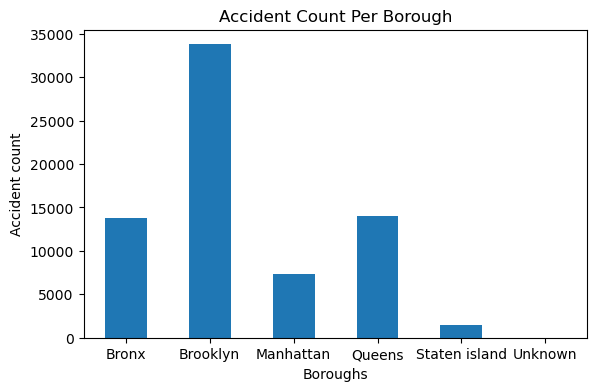

In [253]:
barr = dt.groupby(by = 'Borough')['Collision_id'].count()
plt.figure(figsize = (6.5, 4))
barr.plot(kind = 'bar', rot = 'horizontal')
plt.title('Accident Count Per Borough')
plt.xlabel('Boroughs')
plt.ylabel('Accident count', loc = 'center')
plt.show()

<Axes: xlabel='Contributing_factor_vehicle_1'>

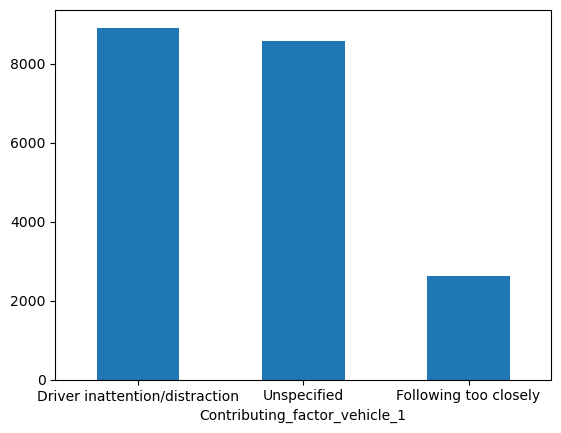

In [384]:
rt = dt[dt['Borough'] == 'Brooklyn']
barr = dt.groupby(by = rt['Contributing_factor_vehicle_1'])['Collision_id'].count().sort_values(ascending = False).head(3)
barr.plot(kind = 'bar', rot = 'horizontal')

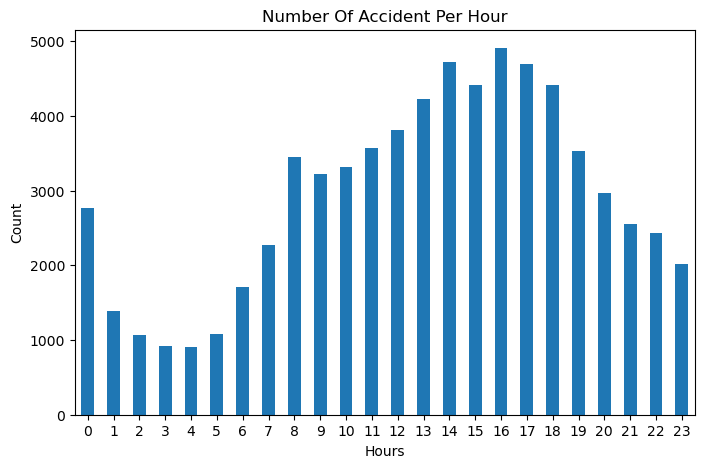

In [382]:
hr = dt['Crash_time'].dt.hour
fd = dt.groupby(by = hr)['Collision_id'].count()
plt.figure(figsize = (8,5))
fd.plot(kind = 'bar', rot = 'horizontal', width = 0.5)
plt.title('Number Of Accident Per Hour')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

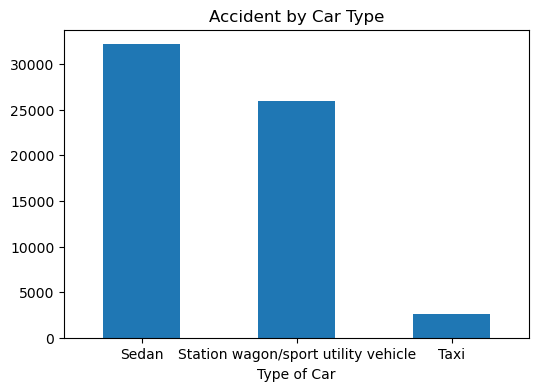

In [408]:
fd = dt['Vehicle_type_code_1'].value_counts().sort_values(ascending = False).head(3)
plt.figure(figsize = (6, 4))
fd.plot(kind = 'bar', rot = 'horizontal')
plt.title('Accident by Car Type')
plt.xlabel('Type of Car')
plt.show()

In [ ]:
kil_inj = dt[['Number_of_persons_injured', 'Number_of_persons_killed','Number_of_pedestrians_injured', 'Number_of_pedestrians_killed','Number_of_cyclist_injured', 'Number_of_cyclist_killed','Number_of_motorist_injured', 'Number_of_motorist_killed']]
sns.heatmap(kil_inj, annot = True, cmap = 'viridis')
plt.show()


KeyboardInterrupt



<Axes: title={'center': 'Number of Accident Per Month'}, xlabel='Crash_date', ylabel='Accident Count'>

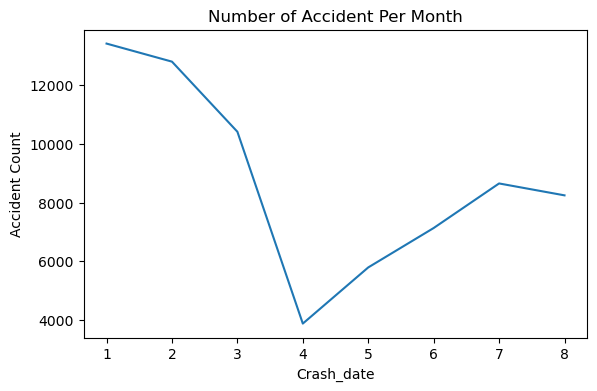

In [232]:
mnth = dt.groupby(by = dt['Crash_date'].dt.month)['Collision_id'].count()
#bv= pd.DataFrame(mnth)
#sns.lineplot(x = 'Crash_date', y = 'Collision_id', data = bv)
plt.figure(figsize = (6.5,4))
plt.title('Number of Accident Per Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
mnth.plot(kind = 'line')